In [13]:
import pandas as pd
import numpy as np

In [14]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [15]:
df = pd.read_csv('./datasets/df_final_0627.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,CD91물(평균),BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,금값종가,선행지수순환변동치,EPU,장단기금리spread,물건금액(만원)
0,노원구,2016-01-01,39.96,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.67,1.50,25,83.3,1175.45,76.81,99.6,177.148845,0.14,18000
1,성동구,2016-01-01,75.37,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.67,1.50,26,83.3,1175.45,76.81,99.6,177.148845,0.14,55200
2,금천구,2016-01-01,84.83,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.67,1.50,14,83.3,1175.45,76.81,99.6,177.148845,0.14,36800
3,은평구,2016-01-01,101.97,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.67,1.50,6,83.3,1175.45,76.81,99.6,177.148845,0.14,67600
4,노원구,2016-01-01,84.59,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.67,1.50,26,83.3,1175.45,76.81,99.6,177.148845,0.14,30300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536092,서초구,2022-12-31,152.33,9,2236.399902,4.10,77.2,3698,3.59,3.54,...,4.02,3.25,18,105.0,1260.92,76.11,99.1,169.662386,0.39,250000
536093,송파구,2022-12-31,84.71,11,2236.399902,4.10,77.2,3698,3.59,3.54,...,4.02,3.25,34,105.0,1260.92,76.11,99.1,169.662386,0.39,138000
536094,송파구,2022-12-31,84.90,24,2236.399902,4.10,77.2,3698,3.59,3.54,...,4.02,3.25,14,105.0,1260.92,76.11,99.1,169.662386,0.39,172000
536095,양천구,2022-12-31,64.02,5,2236.399902,4.10,77.2,3698,3.59,3.54,...,4.02,3.25,26,105.0,1260.92,76.11,99.1,169.662386,0.39,37000


# Train/Test Split

In [16]:
# Train : 2016-2020
# Test : 2021-2022

# 시계열
df['계약일'] = pd.to_datetime(df['계약일'])

In [17]:
train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']

In [18]:
# 숫자형 컬럼만 추출(X, y포함)
train_df_num = train_df.select_dtypes([np.number])

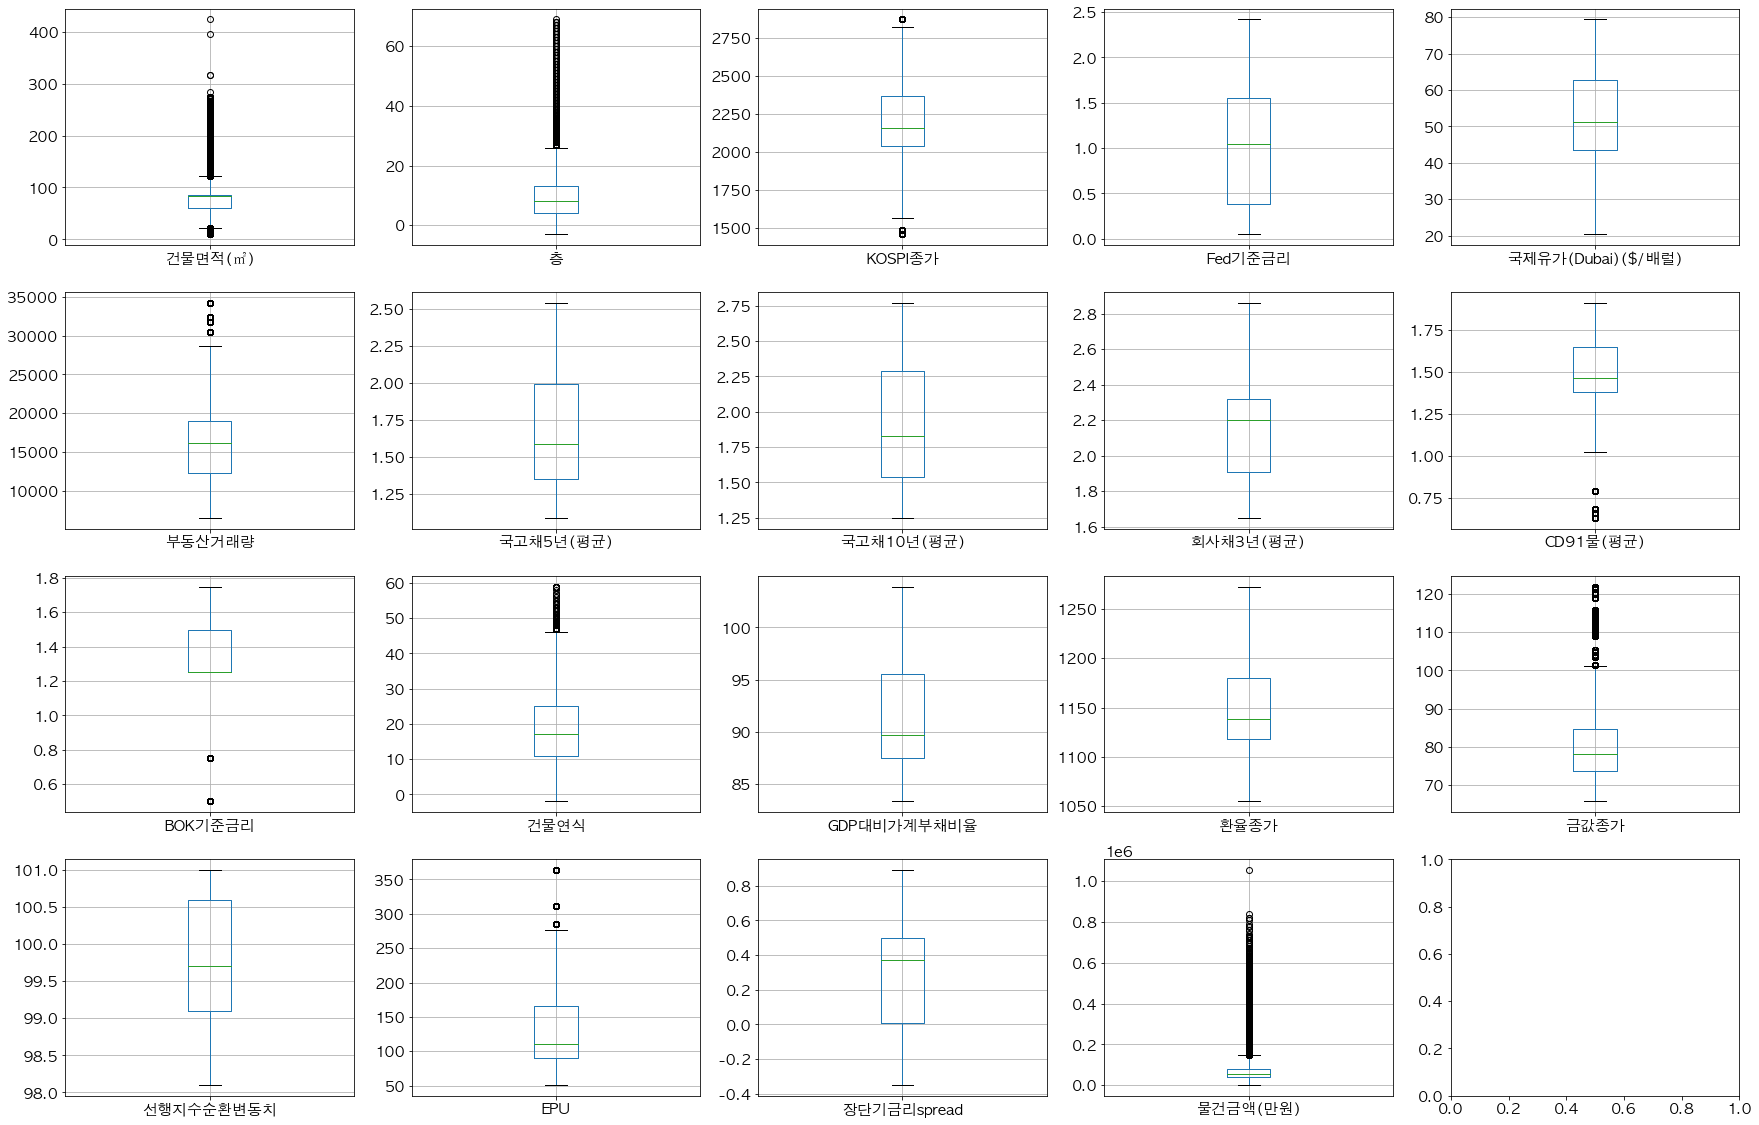

In [23]:
## boxplot
from matplotlib import rc 
col_n = 5
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(train_df_num.columns):
    train_df_num.boxplot(column=col,ax=ax[int(i/col_n),int(i%col_n)])

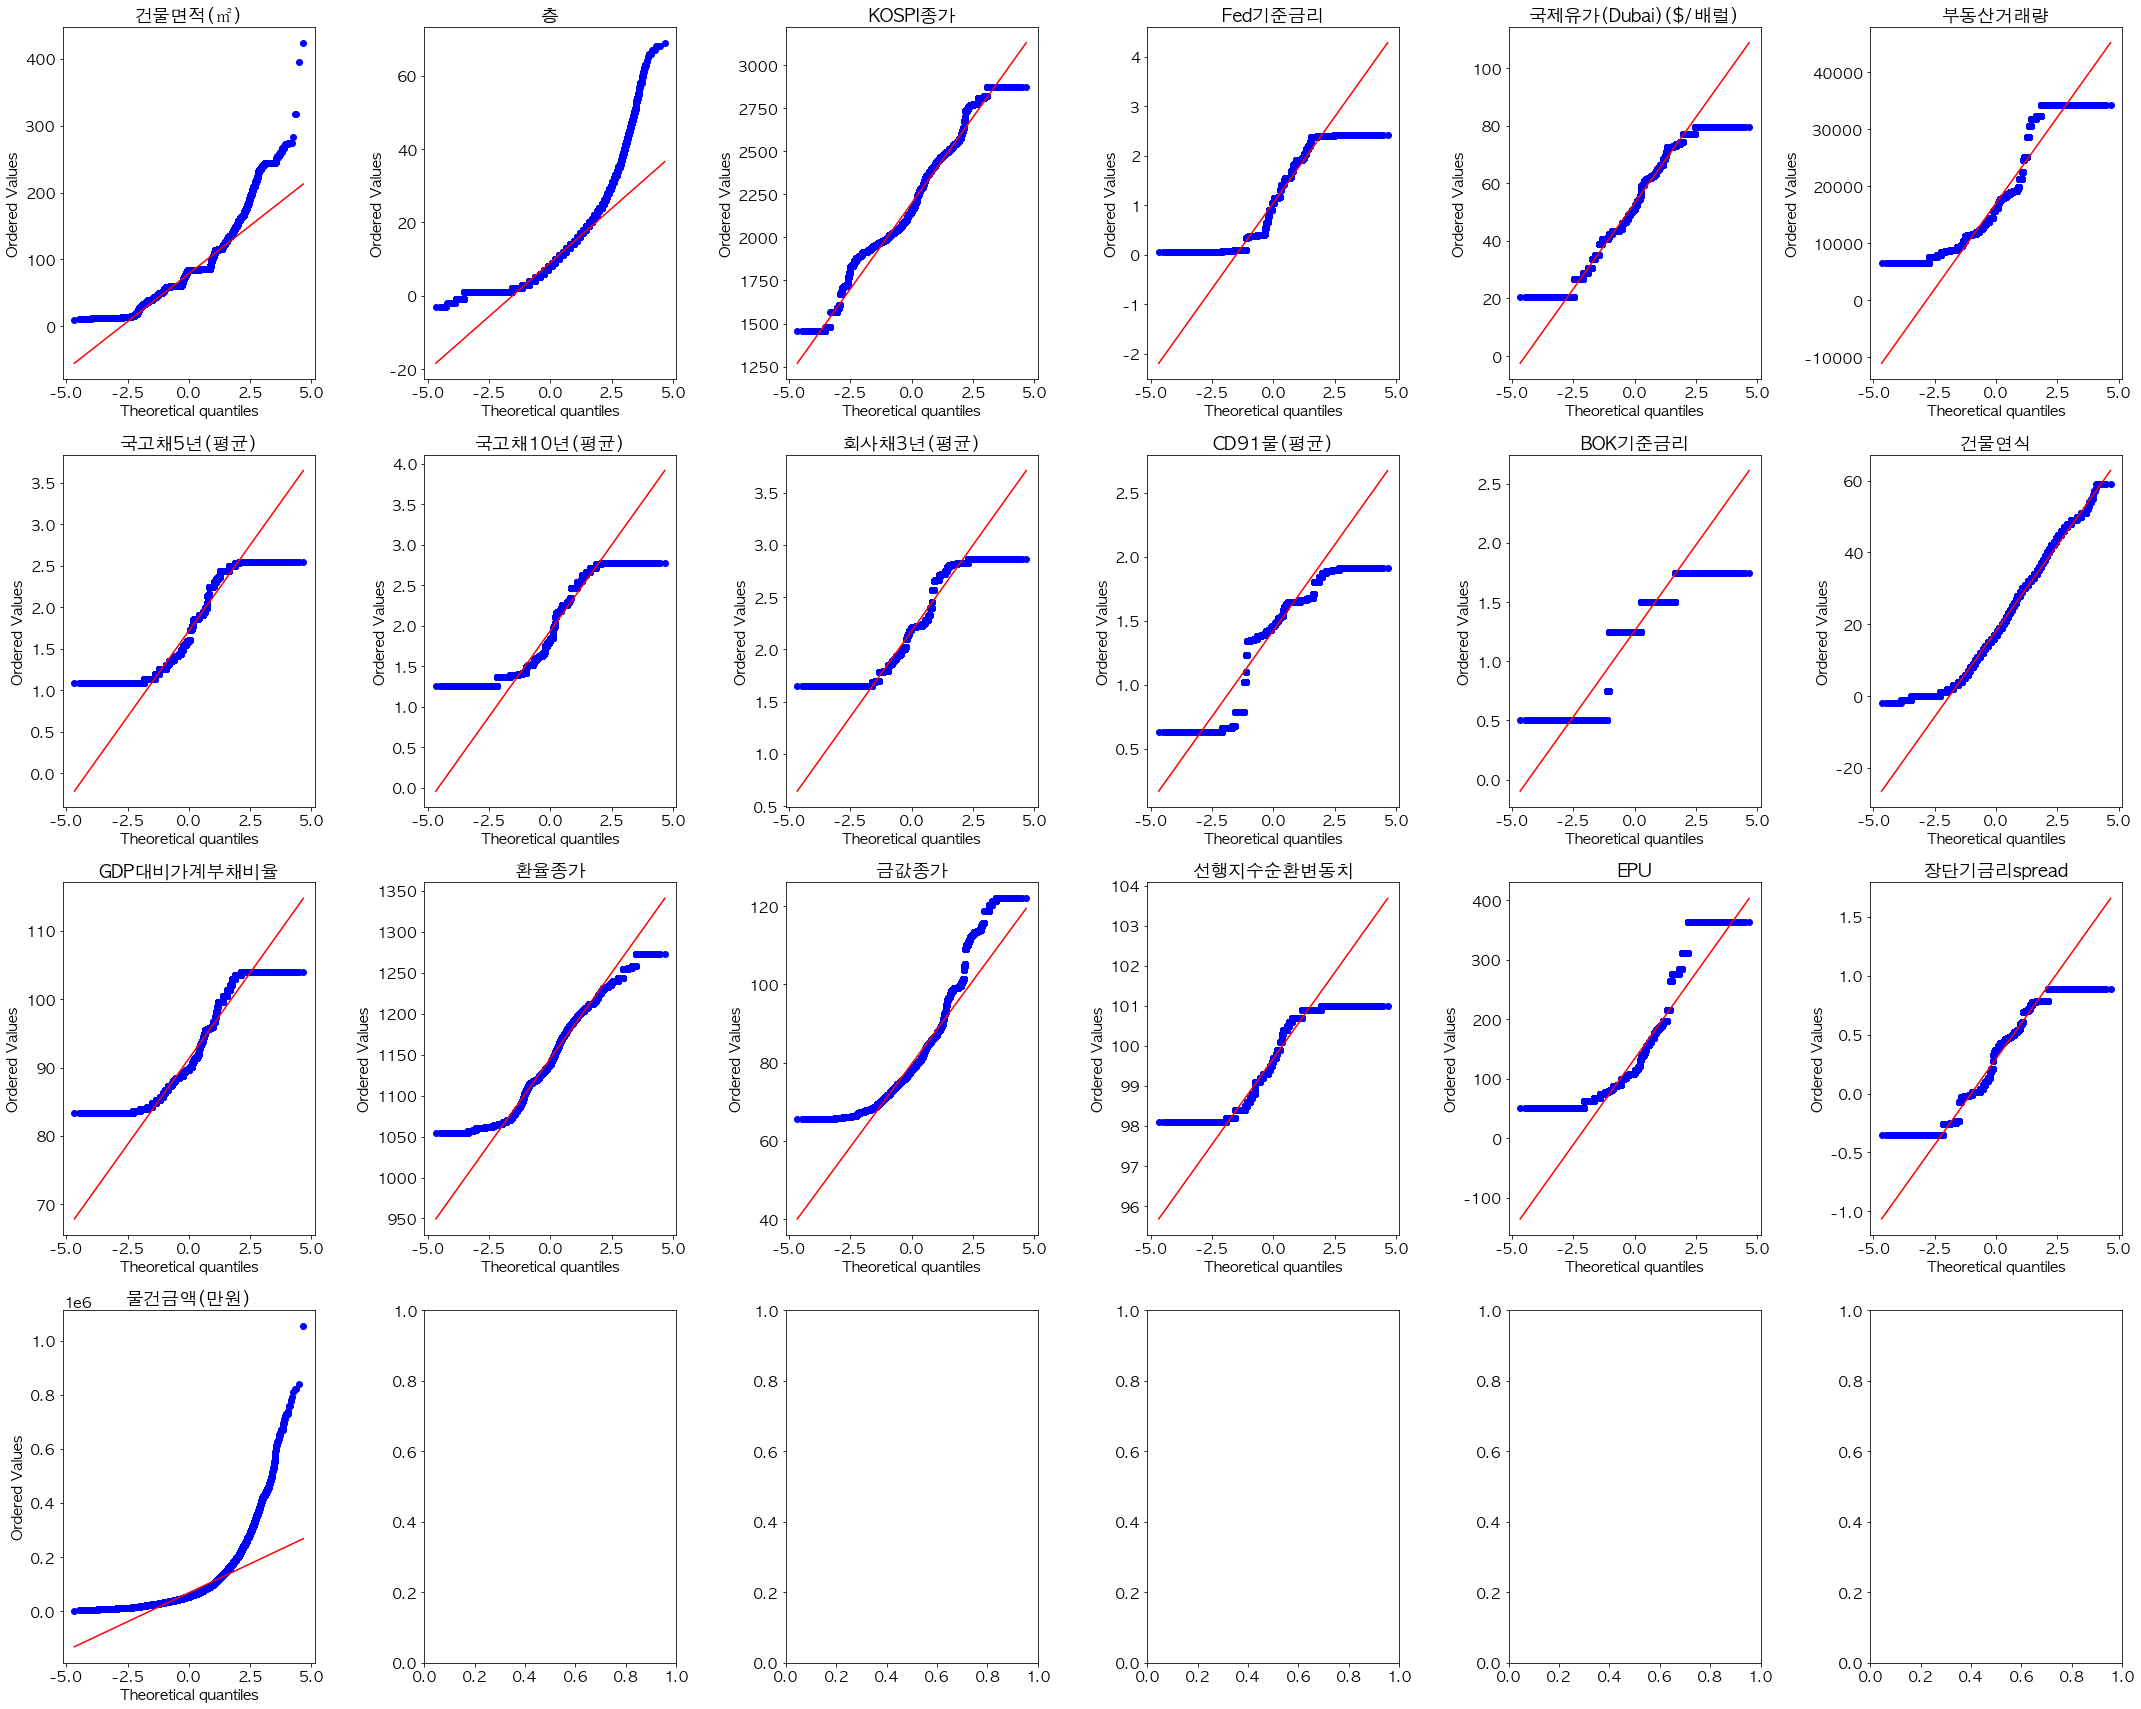

In [20]:
## qqplot
col_n = 6
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*6))

for i,col in enumerate(train_df_num.columns):
    stats.probplot(train_df_num[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])
    ax[int(i/col_n),int(i%col_n)].set_title(col)  # 컬럼 이름 설정

fig.tight_layout()  # 그래프 간격 자동 조정
plt.show()

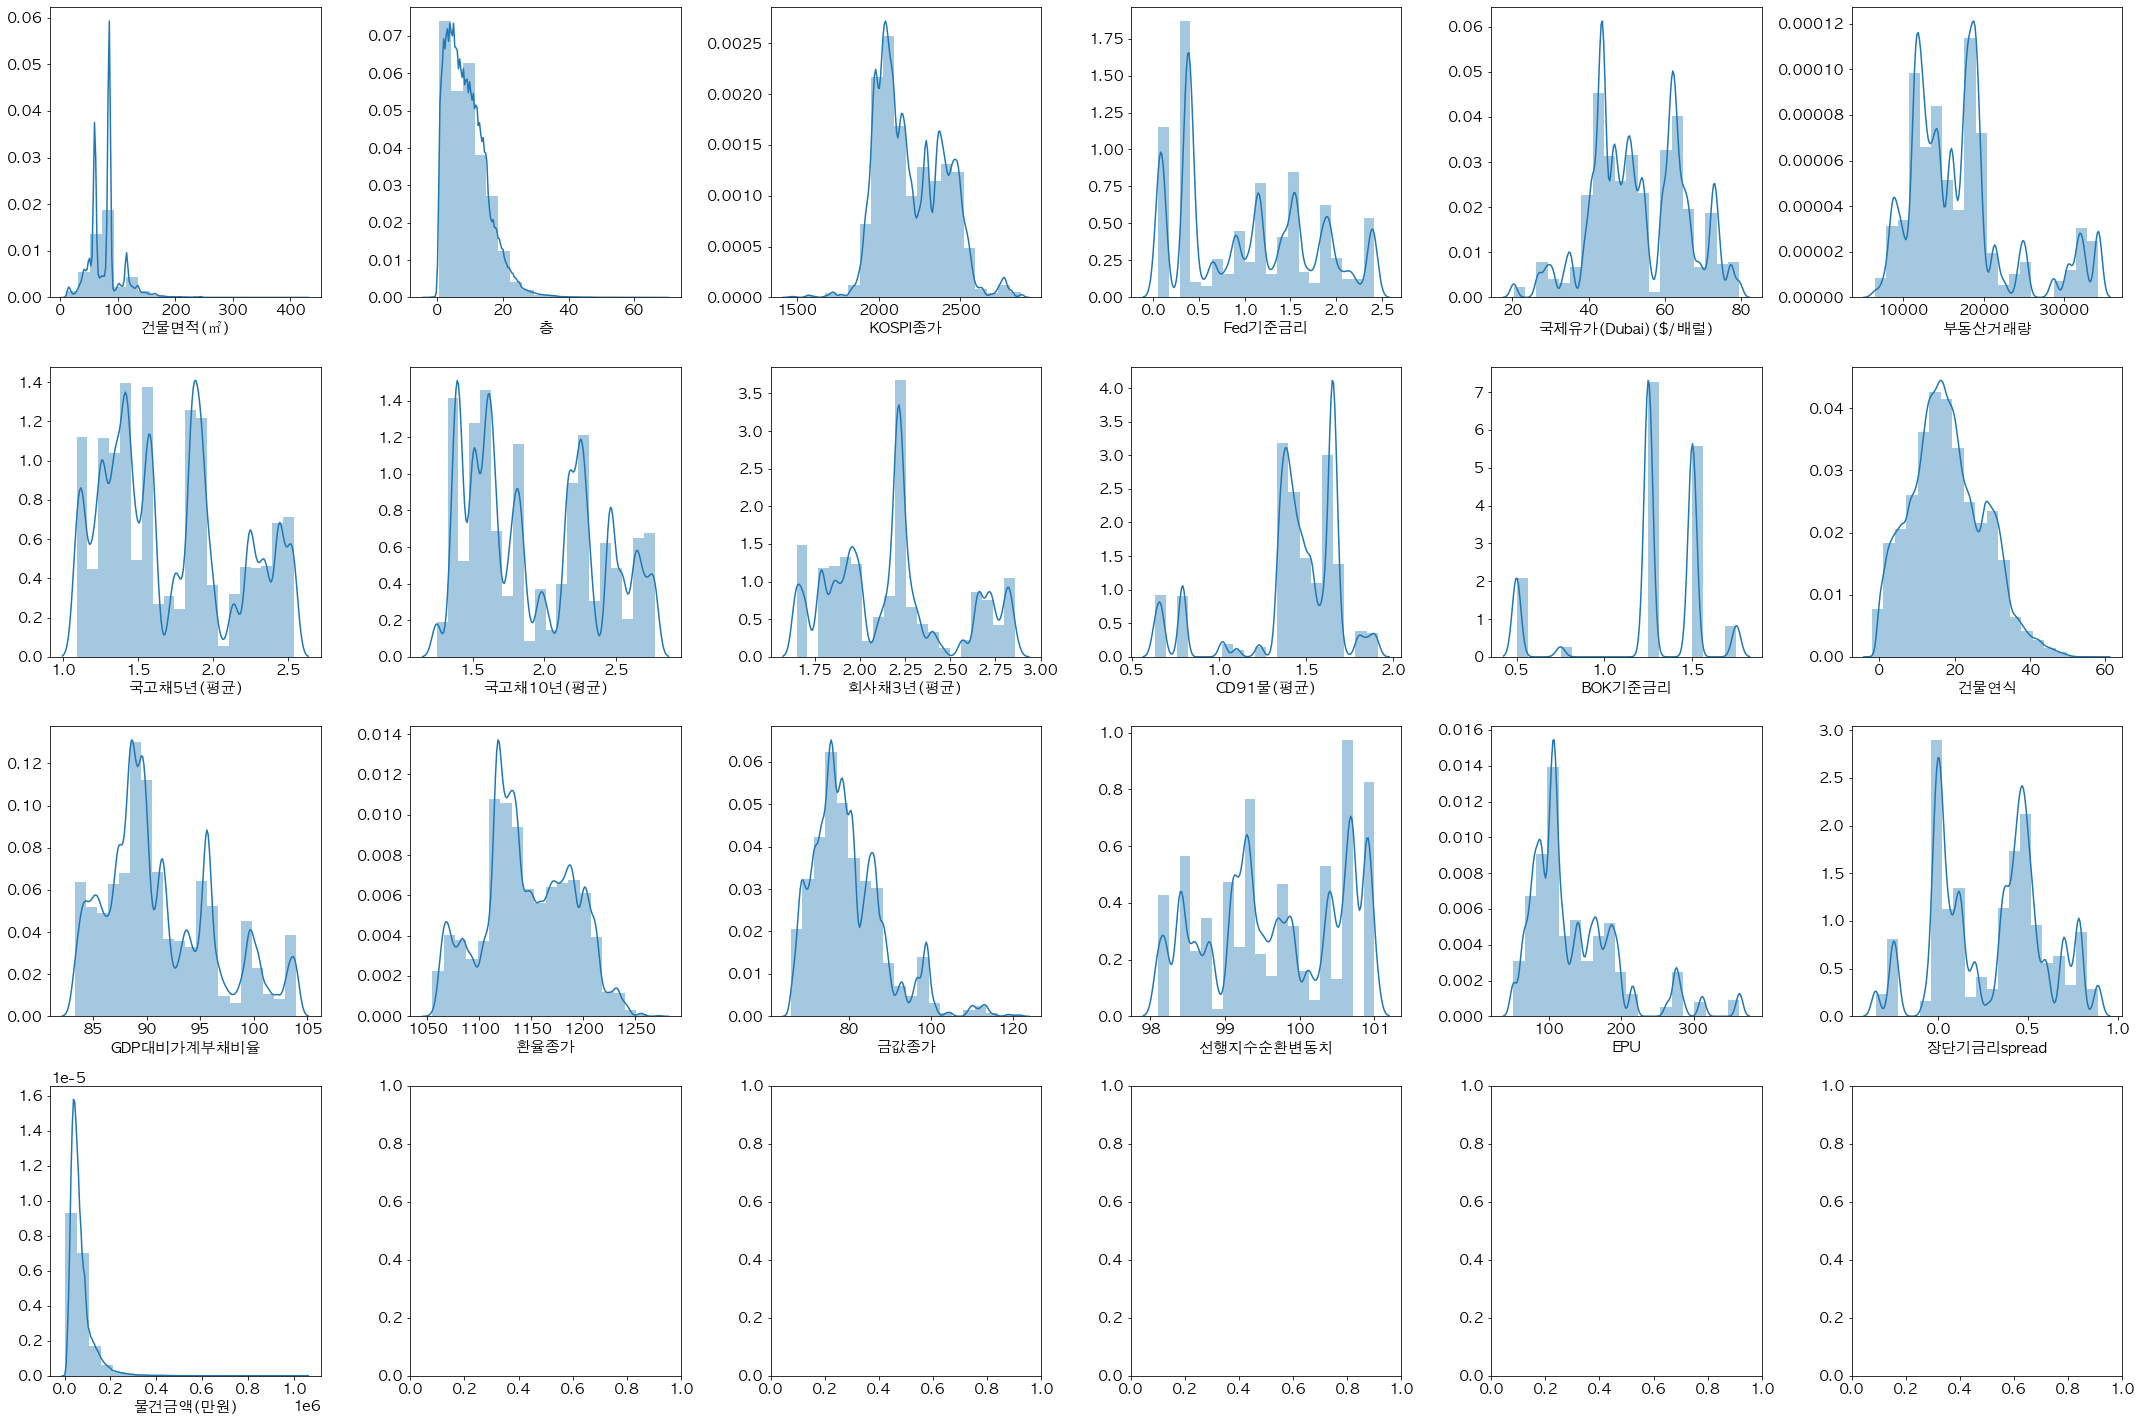

In [21]:
## histogram
col_n = 6
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(train_df_num.columns):
    sns.distplot(train_df_num[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])
    ax[int(i/col_n),int(i%col_n)].set_ylabel('')  # 세로축 레이블 제거

fig.tight_layout()
plt.show()

# 스케일링 후

In [33]:
# feature & target  split
X = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']

# X_train : 숫자형 컬럼만 
X_train_num = X.select_dtypes([np.number])

In [24]:
# Scaling X -> minMax 
def myscaler(df):
    from sklearn.preprocessing import MinMaxScaler

    df_num = df.select_dtypes([np.number])
    num_col = list(df_num.columns)

    # Scaler 객체 생성
    scaler = MinMaxScaler()
    x_num_scaled = scaler.fit_transform(df_num)

    x_num_scaled = pd.DataFrame(x_num_scaled, columns=num_col)

    X_scaled = df.copy()
    for i in x_num_scaled:
        X_scaled[i] = x_num_scaled[i]

    return X_scaled

In [34]:
X_scaled = myscaler(X_train_num).select_dtypes([np.number])

In [35]:
# Scaling y -> 상용로그
y_scaled = np.log10(y)

In [36]:
# X_scaled랑 y_scaled 합친 데이터프레임
Xy_scaled = pd.concat([X_scaled, y], axis = 1)

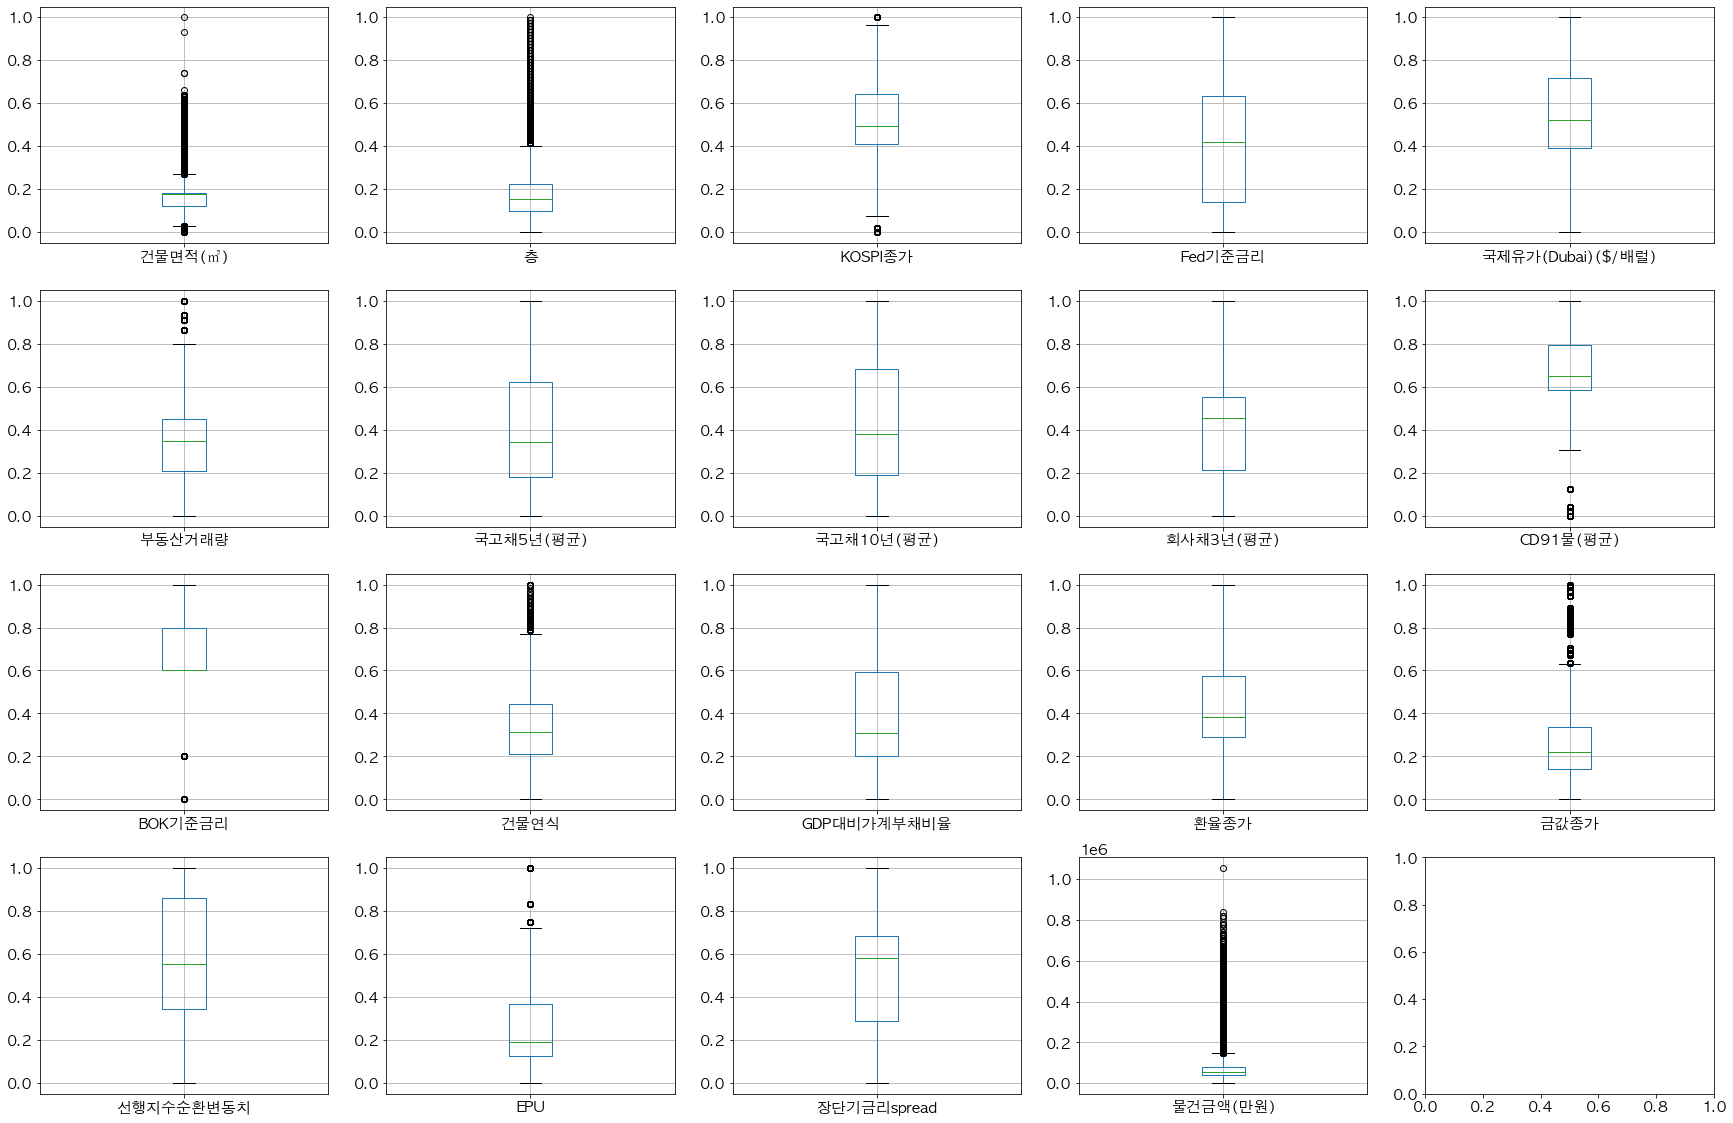

In [37]:
## boxplot
col_n = 5
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(Xy_scaled.columns):
    Xy_scaled.boxplot(column=col,ax=ax[int(i/col_n),int(i%col_n)])

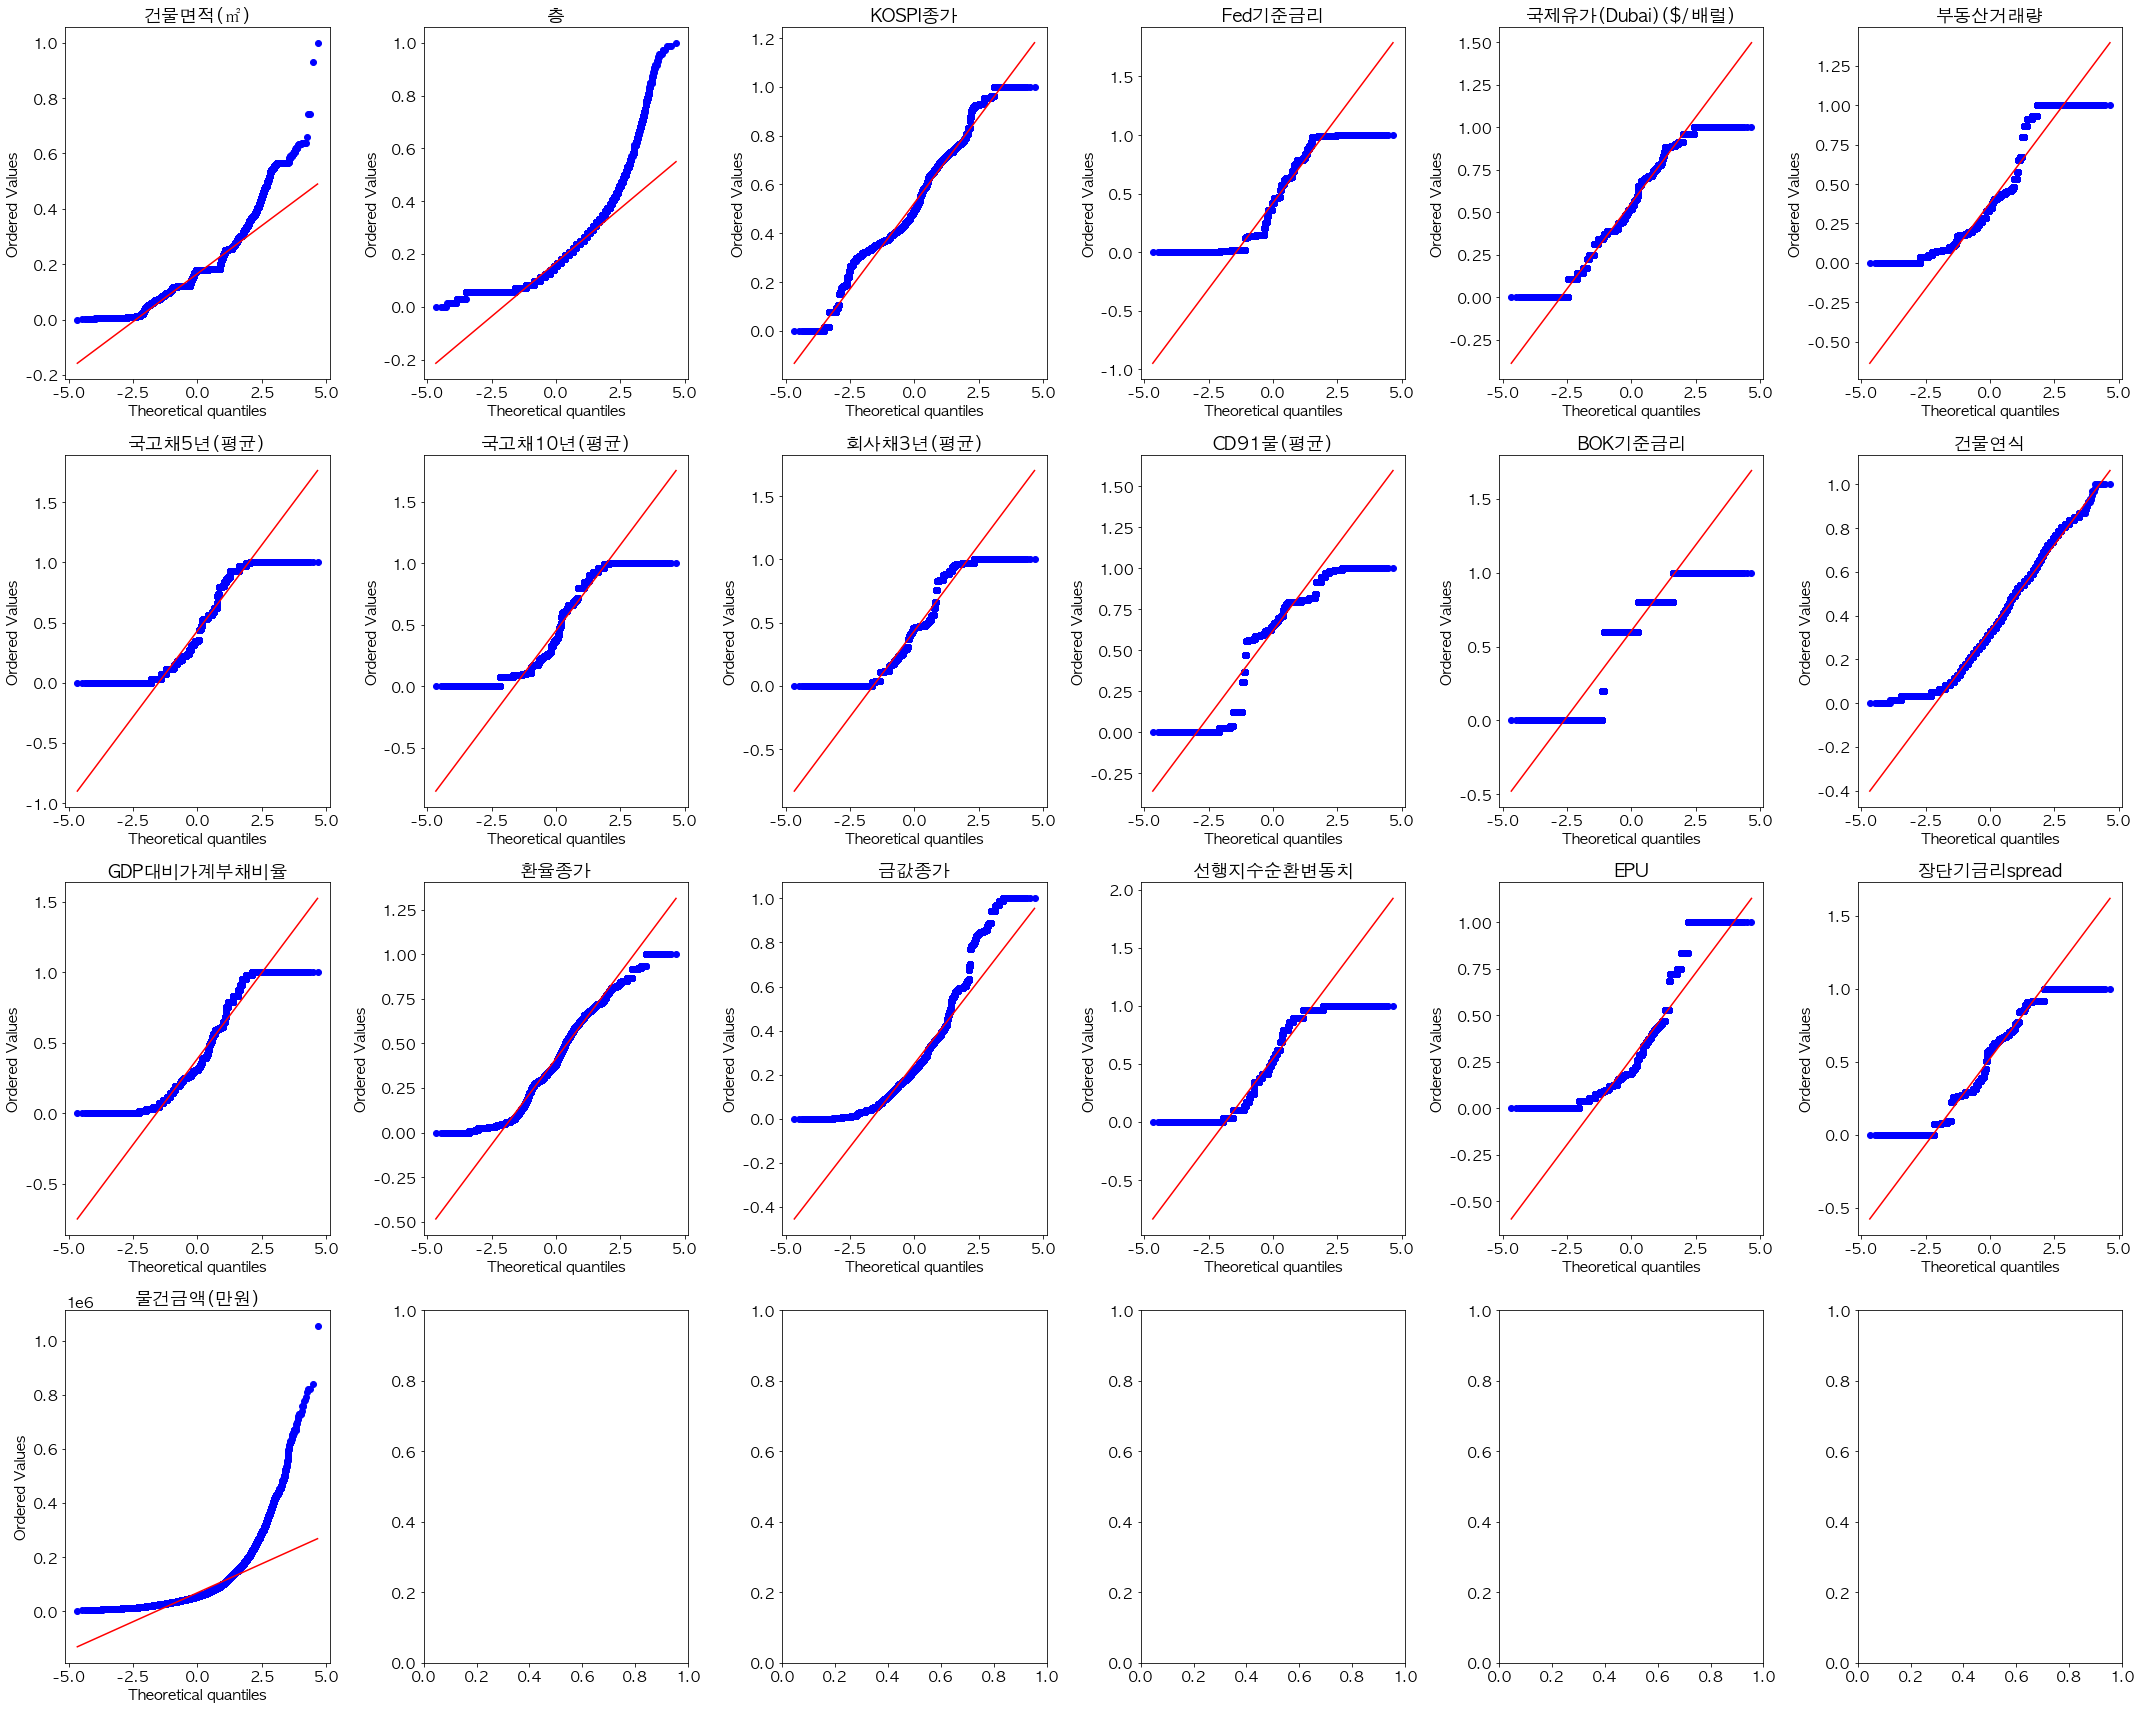

In [38]:
## qqplot
col_n = 6
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*6))

for i,col in enumerate(Xy_scaled.columns):
    stats.probplot(Xy_scaled[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])
    ax[int(i/col_n),int(i%col_n)].set_title(col)  # 컬럼 이름 설정

fig.tight_layout()  # 그래프 간격 자동 조정
plt.show()

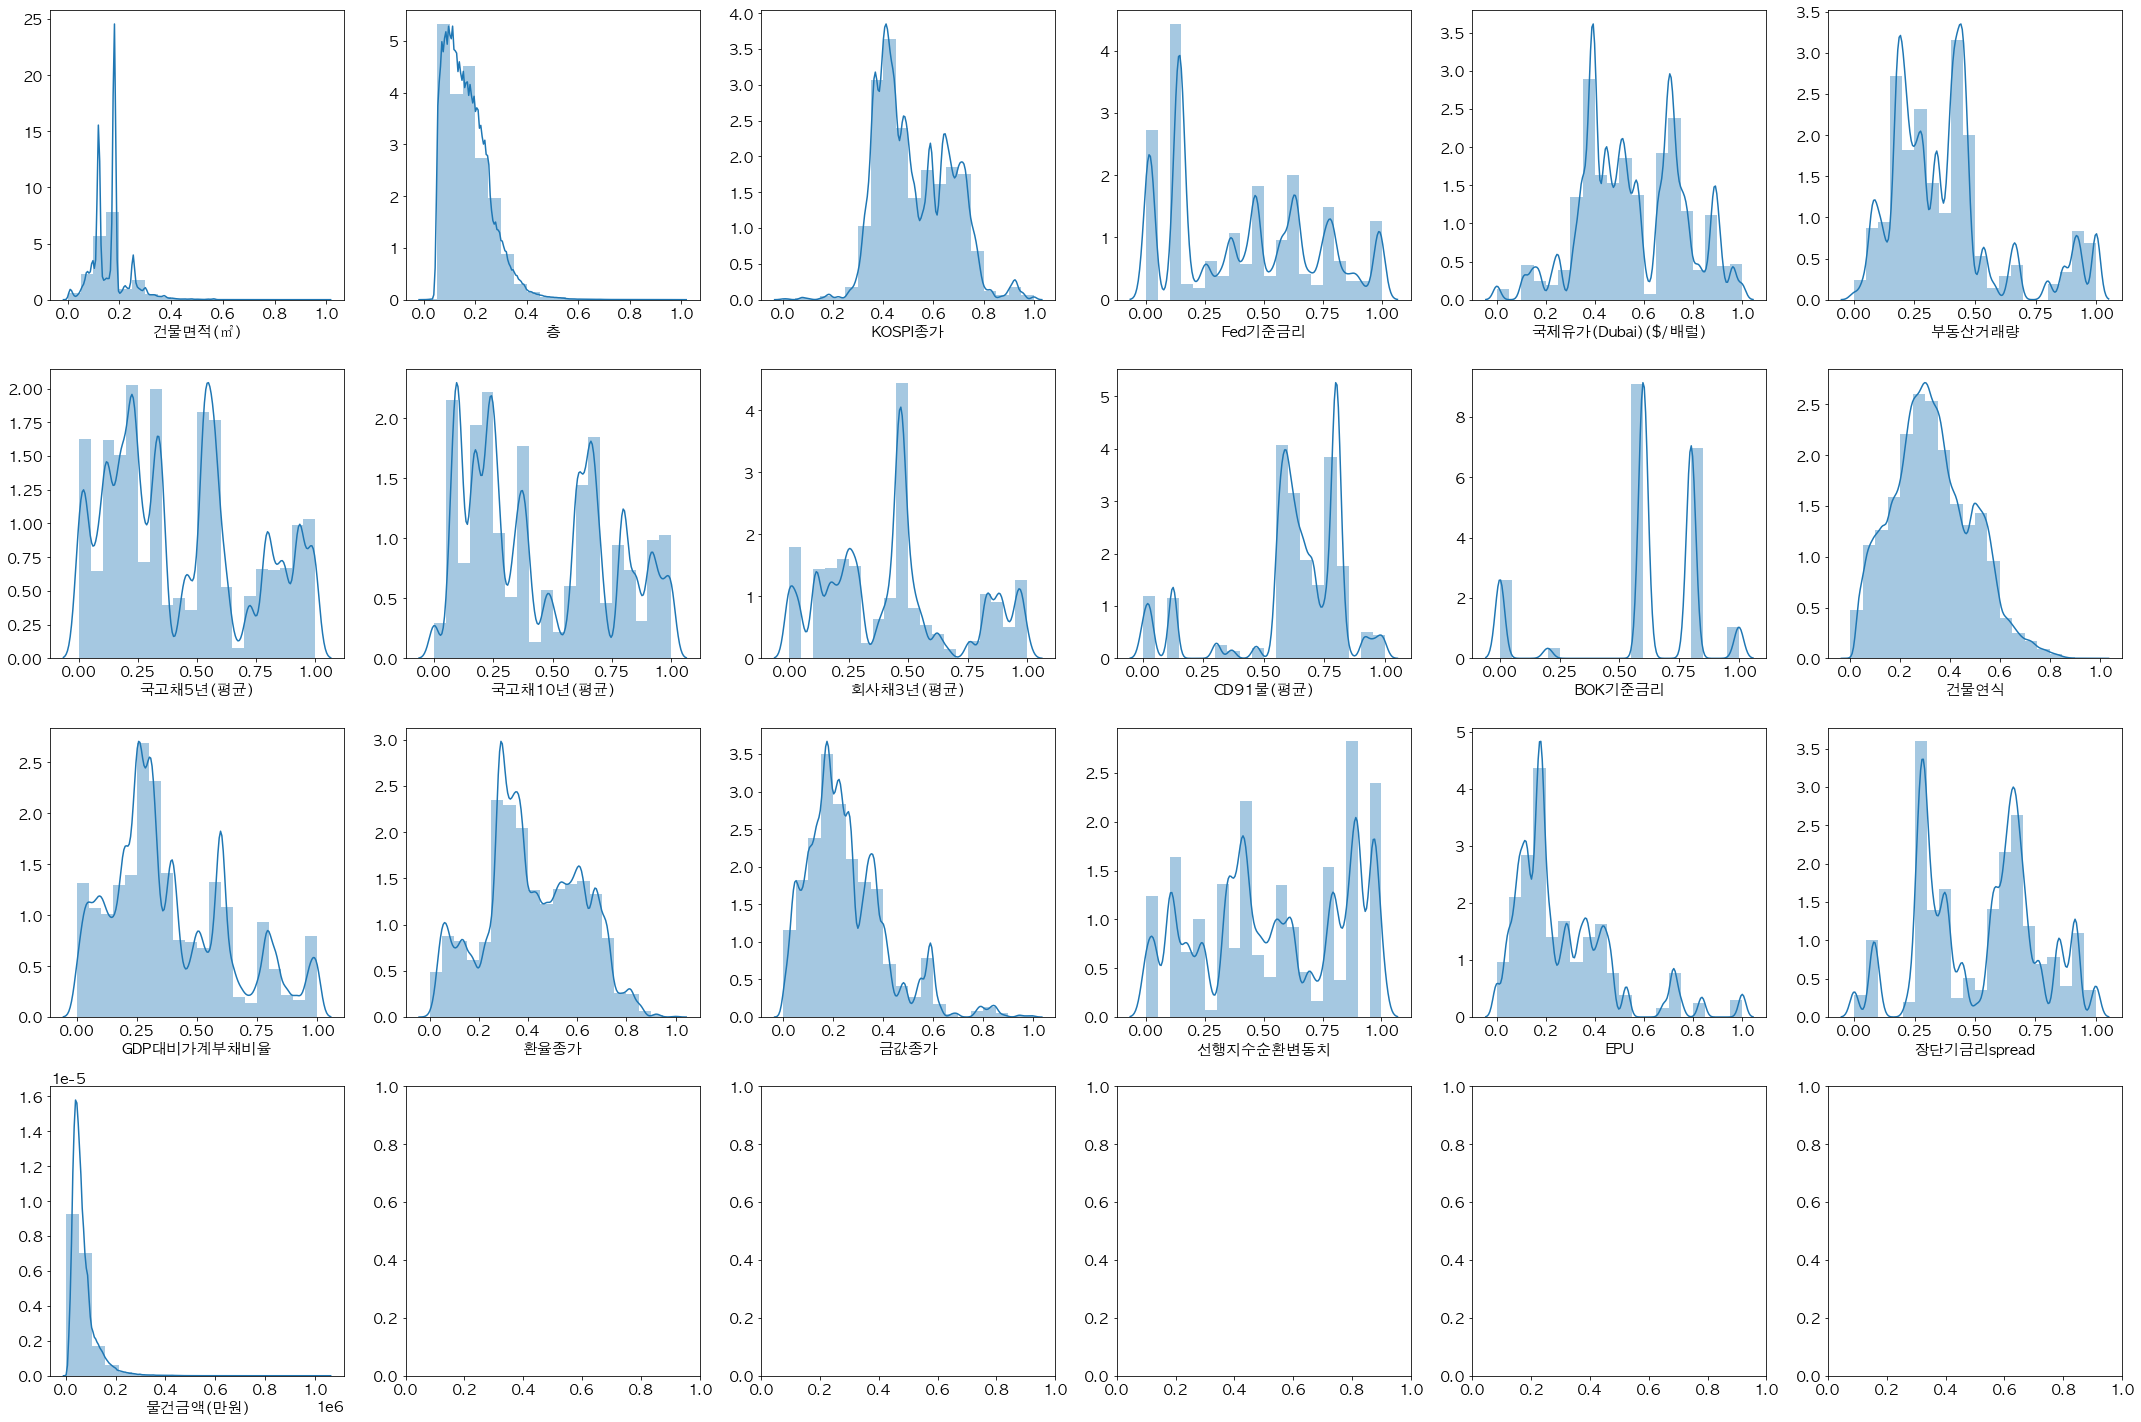

In [39]:
## histogram
col_n = 6
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(Xy_scaled.columns):
    sns.distplot(Xy_scaled[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])
    ax[int(i/col_n),int(i%col_n)].set_ylabel('')  # 세로축 레이블 제거

fig.tight_layout()
plt.show()